In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df  = pd.read_csv("/content/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [19]:
print(df['Gender'].value_counts())
df['Gender']  =df['Gender'].apply(lambda x : 1 if x == "Male" else 0)
print(df['Gender'].value_counts())

Female    204
Male      196
Name: Gender, dtype: int64
0    204
1    196
Name: Gender, dtype: int64


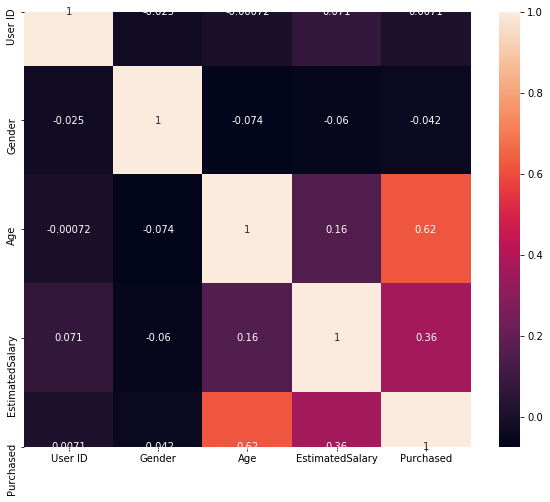

In [29]:
# displaying correlation between individual_features
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

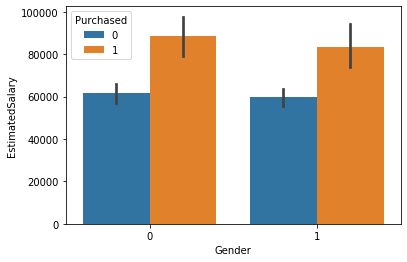

In [31]:
# displaying relationship between how salary and gender is influencing purchased feature .
sns.barplot(x='Gender',y='EstimatedSalary',data=df,hue='Purchased')

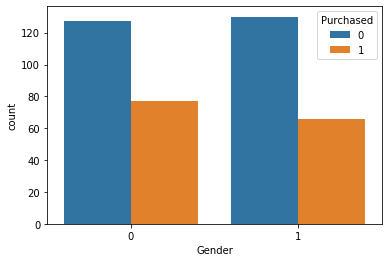

In [33]:
sns.countplot("Gender",hue="Purchased",data=df)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df.drop(["User ID","Purchased"],axis=1)
y = df["Purchased"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [23]:
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

print(classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))
print(accuracy_score(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84        80
           1       0.67      0.78      0.72        40

    accuracy                           0.80       120
   macro avg       0.78      0.79      0.78       120
weighted avg       0.81      0.80      0.80       120

[[65 15]
 [ 9 31]]
0.8


In [24]:
# With standard Scaling

from sklearn.preprocessing import StandardScaler

sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)

knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
knn_pred_ss = knn.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

print(classification_report(y_test,knn_pred_ss))
print(confusion_matrix(y_test,knn_pred_ss))
print(accuracy_score(y_test,knn_pred_ss))

              precision    recall  f1-score   support

           0       0.99      0.93      0.95        80
           1       0.87      0.97      0.92        40

    accuracy                           0.94       120
   macro avg       0.93      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120

[[74  6]
 [ 1 39]]
0.9416666666666667


Text(0.5, 1.0, 'Attempt2')

<Figure size 432x288 with 0 Axes>

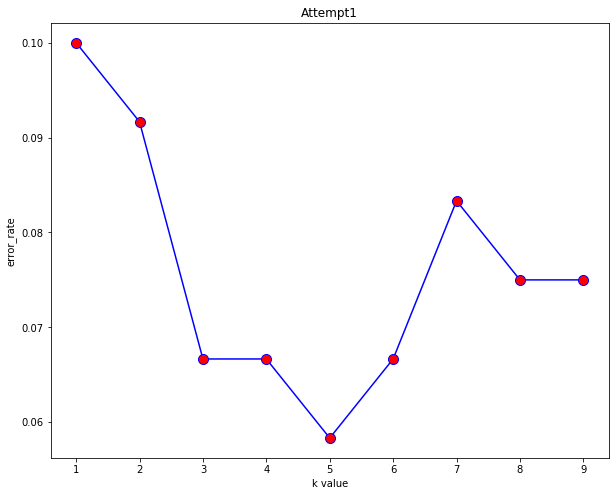

<Figure size 432x288 with 0 Axes>

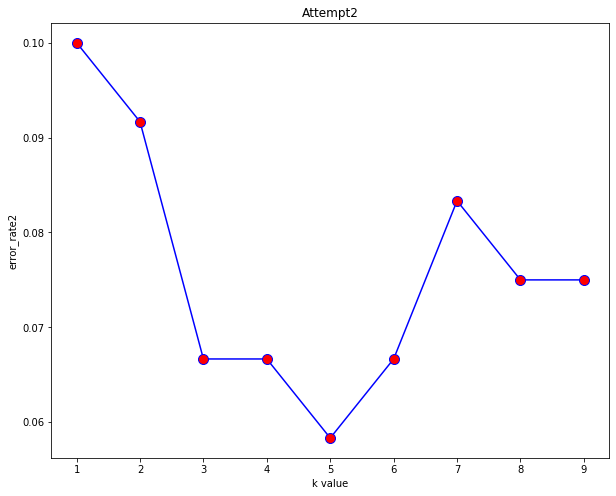

In [61]:
# fidning the best value of K by calculating using 2 diff approach
error_rate = []
error_rate2 = []
for i in range(1,10):


  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  knn_pred_ss = knn.predict(X_test)

  error_rate.append(1 - accuracy_score(y_test,knn_pred_ss))
  error_rate2.append(np.mean(knn_pred_ss != y_test))

plt.subplots(0,0)
plt.figure(figsize=(10,8))
plt.plot(range(1,10) ,error_rate,marker = 'o',markersize=10,markerfacecolor='red',color='blue')
plt.xlabel('k value')
plt.ylabel('error_rate')
plt.title("Attempt1")

plt.subplots(1,0)
plt.figure(figsize=(10,8))
plt.plot(range(1,10) ,error_rate2,marker = 'o',markersize=10,markerfacecolor='red',color='blue')
plt.xlabel('k value')
plt.ylabel('error_rate2')
plt.title("Attempt2")

In [27]:
# getting user input to determine if they would /would not purchase an add
# input 1: 1(Male), 54(Age), 90000(Salary)
# input 2: 0(Female), 34(Age), 110000(Salary)

userinput = [[1,54,90000],[1,24,110000]]
final_user_input  = sd.transform(userinput)
user_pred = knn.predict(final_user_input)
user_pred

array([1, 0])

In [38]:
# using LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear',penalty='l2')

sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)

lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

print(classification_report(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred))
print(accuracy_score(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        80
           1       0.78      0.70      0.74        40

    accuracy                           0.83       120
   macro avg       0.82      0.80      0.81       120
weighted avg       0.83      0.83      0.83       120

[[72  8]
 [12 28]]
0.8333333333333334


In [63]:
# using SVC
from sklearn.svm import SVC

svc = SVC(kernel='rbf')

sd = StandardScaler()
X_train = sd.fit_transform(X_train)
X_test = sd.transform(X_test)

svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

print(classification_report(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(accuracy_score(y_test,svc_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        80
           1       0.83      0.97      0.90        40

    accuracy                           0.93       120
   macro avg       0.91      0.94      0.92       120
weighted avg       0.93      0.93      0.93       120

[[72  8]
 [ 1 39]]
0.925


In [65]:
# using DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)

print(classification_report(y_test,dtc_pred))
print(confusion_matrix(y_test,dtc_pred))
print(accuracy_score(y_test,dtc_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        80
           1       0.82      0.93      0.87        40

    accuracy                           0.91       120
   macro avg       0.89      0.91      0.90       120
weighted avg       0.91      0.91      0.91       120

[[72  8]
 [ 3 37]]
0.9083333333333333


In [69]:
from sklearn.ensemble import  RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20)

rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))
print(accuracy_score(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.90      0.94        80
           1       0.83      0.97      0.90        40

    accuracy                           0.93       120
   macro avg       0.91      0.94      0.92       120
weighted avg       0.93      0.93      0.93       120

[[72  8]
 [ 1 39]]
0.925


In [73]:
# using  naive bayes 
from sklearn.naive_bayes import BernoulliNB,GaussianNB

bnb = BernoulliNB()

bnb.fit(X_train,y_train)
bnb_pred = bnb.predict(X_test)

print("BernoulliNB classification_report: \n",classification_report(y_test,bnb_pred))
print("BernoulliNB confusion_matrix : \n",confusion_matrix(y_test,bnb_pred))
print("BernoulliNB accuracy_score: \n",accuracy_score(y_test,bnb_pred))
print("\n")

gnb = GaussianNB()

gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)

print("GaussianNB classification_report: \n",classification_report(y_test,gnb_pred))
print("GaussianNB confusion_matrix: \n",confusion_matrix(y_test,gnb_pred))
print("GaussianNB accuracy_score: \n",accuracy_score(y_test,gnb_pred))
print("\n")



BernoulliNB classification_report: 
               precision    recall  f1-score   support

           0       0.77      0.84      0.80        80
           1       0.61      0.50      0.55        40

    accuracy                           0.73       120
   macro avg       0.69      0.67      0.68       120
weighted avg       0.72      0.72      0.72       120

BernoulliNB confusion_matrix : 
 [[67 13]
 [20 20]]
BernoulliNB accuracy_score: 
 0.725


GaussianNB classification_report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93        80
           1       0.85      0.88      0.86        40

    accuracy                           0.91       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.91      0.91      0.91       120

GaussianNB confusion_matrix: 
 [[74  6]
 [ 5 35]]
GaussianNB accuracy_score: 
 0.9083333333333333




### ***For the given dataset by far the  best model has been K Nearest Neighbors .***